In [42]:
#importing DataSet
import pandas as pd 
training_data = pd.read_csv("data.csv")
training_data.head()

,id,first_name,last_name,age,height,weight,gender,activity,calorie intake,health
0,1,Letta,Ceci,94,140,27,Female,-1,1,0
1,2,Eziechiele,Barge,17,171,21,Male,-1,0,0
2,3,Sibilla,Solleme,9,194,137,Female,0,0,1
3,4,Wanids,Pimblott,3,113,130,Female,-1,-1,1
4,5,Evangeline,Braganca,39,180,55,Female,0,-1,0


In [43]:
# Generating Random Values To Fill DataSet
import random
height = []
weight = []
bmi  = []
for i in range(1000):
    h = random.randint(80,200)
    height.append(h)
    b = random.randint(15, 35)
    w = b * (h/100) * (h/100)
    weight.append(w)
    bmi.append(b)
    
first_name = list(training_data['first_name'].values)
last_name = list(training_data['last_name'].values)
gender = list(training_data['gender'].values)
activity = list(training_data['activity'].values)
calorie = list(training_data['calorie intake'].values)
health = list(training_data['health'].values)

# BMI as VALUES -1, 0, 1
b = []
for i in bmi:
    if i < 18:
        b.append(-1)
    elif i >=18 and i <= 25:
        b.append(0)
    else:
        b.append(1)

In [2]:
# Filling Health parameter According to Conditions
h= []
for i in range(1000):
    if b[i] == -1:
        if activity[i] == -1:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(1)
        elif activity[i] == 0:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(1)
        elif activity[i] == 1:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(1)
                
    elif b[i] == 0:
        if activity[i] == -1:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(0)
        elif activity[i] == 0:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(1)
            if calorie[i] == 1:
                h.append(0)
        elif activity[i] == 1:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(1)
                
    elif b[i] == 1:
        if activity[i] == -1:
            if calorie[i] == -1:
                h.append(0)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(0)
        elif activity[i] == 0:
            if calorie[i] == -1:
                h.append(1)
            if calorie[i] == 0:
                h.append(0)
            if calorie[i] == 1:
                h.append(0)
        elif activity[i] == 1:
            if calorie[i] == -1:
                h.append(1)
            if calorie[i] == 0:
                h.append(1)
            if calorie[i] == 1:
                h.append(0)

NameError: name 'b' is not defined

In [45]:
training_data = pd.DataFrame({'first_name':first_name, 'last_name':last_name, 'gender':gender, 'height':height, 'weight':weight, 'bmi_value':bmi,'bmi':b, 'activity':activity, 'calorie': calorie, 'health': h})
training_data.head(10)

,first_name,last_name,gender,height,weight,bmi_value,bmi,activity,calorie,health
0,Letta,Ceci,Female,194,109.1444,29,1,-1,1,0
1,Eziechiele,Barge,Male,158,47.4316,19,0,-1,0,0
2,Sibilla,Solleme,Female,137,30.0304,16,-1,0,0,0
3,Wanids,Pimblott,Female,121,39.5307,27,1,-1,-1,0
4,Evangeline,Braganca,Female,97,15.9953,17,-1,0,-1,0
5,Judd,Rozier,Male,87,25.7346,34,1,-1,-1,0
6,Fletch,Monketon,Male,140,39.2000,20,0,0,1,0
7,Jamima,Cunningham,Female,171,99.4194,34,1,-1,-1,0
8,Base,Kippin,Male,106,39.3260,35,1,0,0,0
9,Sasha,Limeburn,Female,138,30.4704,16,-1,1,1,1


In [46]:
print(training_data.groupby('health').size())

health
0    704
1    296
dtype: int64


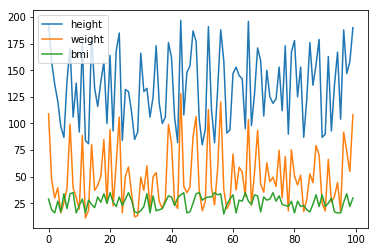

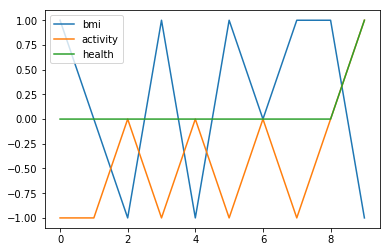

In [90]:
import matplotlib.pyplot as plt
# Cleaning DATA and Visualising it
dataset = pd.DataFrame({'bmi':b, 'activity':activity, 'calorie': calorie, 'health': h})
dataset.head()

plt.plot(height[:100], label='height')
plt.plot(weight[:100],label='weight')
plt.plot(bmi[:100],label='bmi')
plt.legend()
plt.show()
plt.plot(b[:10],label="bmi")
plt.plot(activity[:10], label="activity")
plt.plot(h[:10], label="health")
plt.legend()
plt.show()

In [ ]:
# Cleaning DATA
array = dataset.values
X = array[0:,0:3]
Y = array[0:,3]

In [48]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 80% training and 30% test

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


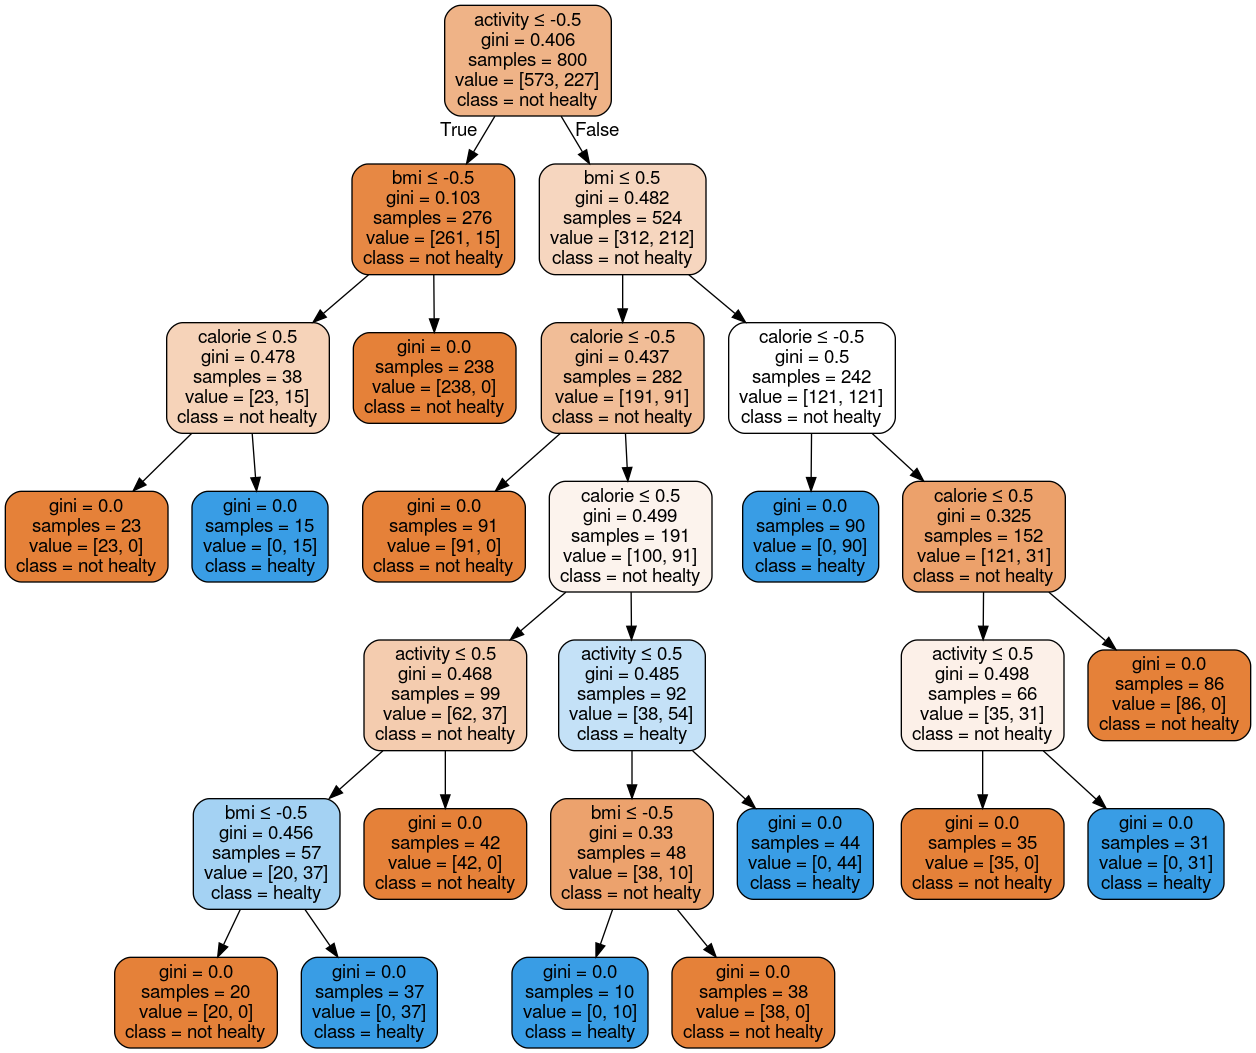

In [49]:
# GETTING IMAGE OF DECISION TREE

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ['bmi','activity','calorie']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['not healty','healty'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('health.png')
Image(graph.create_png())